In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The purpose of this notebook is to read, process and plot sea surface temperature data from the NOAA OISST V2 High Resolution Dataset.

The data is available from here ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2.highres/

It is described in the NCAR Climate Data Guide here https://climatedataguide.ucar.edu/climate-data/sst-data-noaa-high-resolution-025x025-blended-analysis-daily-sst-and-ice-oisstv2

I'm going to use xarray, matplotlib and cartopy to read, process and plot, as well as numpy etc to help out with processing.

In [2]:
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import os

## Access online data directly

The data is on an ftp site so we can access this remotely using xarray.open_dataset or xarray.open_mfdataset

In [3]:
filePath = 'ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2.highres'
fileNameFmt = 'sst.day.mean.{:d}.v2.nc' # Defines the name format for daily SST file: fileNameFmt.format(year)

In [4]:
def get_noaa_oisst(year, save=False, savedir='.'):
    """
    Retrieves NOAA OISST v2 daily SST fields for year
    
    Returns xarray dataset
    """
    
    import urllib.request
    
    url = 'ftp://ftp.cdc.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.day.mean.{}.v2.nc'.format(year)

    fn, headers = urllib.request.urlretrieve(url)
    ds = xr.open_dataset(fn)
    
    #if not save:
    #    os.remove(fn)
    #else:
    #    os.rename( fn, os.path.join(savedir, os.path.basename(url)) )
        
    return ds


In [31]:
ds = get_noaa_oisst(2007)
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-01-02 2007-01-03 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:48:24 2017: ncatted -O -a References,global...
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature

In [38]:
dsMon = ds['sst'].resample(time='M', label='left').mean(dim='time') #ds['sst'].groupby('time.month').mean(dim='time')
dsMon

<xarray.DataArray 'sst' (time: 12, lat: 720, lon: 1440)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.73871 , -1.73871 , ..., -1.738387, -1.738387],
        [-1.73871 , -1.73871 , ..., -1.73871 , -1.73871 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.7175  , -1.7175  , ..., -1.7175  , -1.7175  ],
        [-1.717857, -1.717857, ..., -1.717857, -1.717857]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.71    , -1.71    , ..., -1.71    , -1.71    ],
        [-1.71    , -1.71    , ..., -1.71    , -1.71    ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.696774, -1.696774, ..., -1.696774,

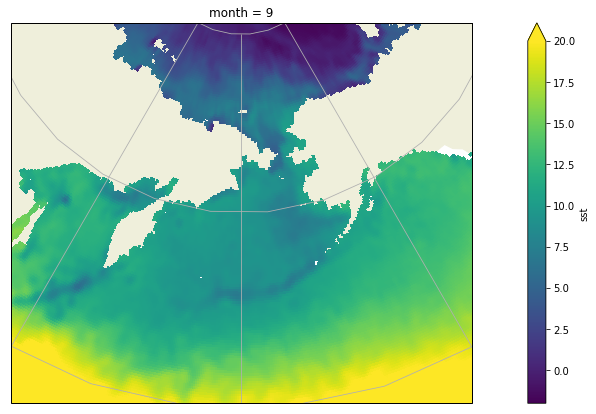

In [35]:
#map_proj = ccrs.LambertConformal() #AzimuthalEqualArea()
map_proj = ccrs.NorthPolarStereo(central_longitude=180.)

fig = plt.figure(figsize=(20,7))
ax = plt.subplot(projection=map_proj)
ax.set_extent([150.,210.,40.,80.], ccrs.PlateCarree())
dsMon.sel(month=9).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=20)
ax.add_feature(cfeature.LAND)
ax.gridlines(xlocs=[0,150,180,210,359], ylocs=[40,60,80], linestyles='dotted')